<a href="https://colab.research.google.com/github/222010303005/Final-Year-Mini-Project_7016/blob/main/EDA_preprocessing_and_Vader.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import re
import requests
import matplotlib.pyplot as plt
%matplotlib inline

import nltk
nltk.download('stopwords')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
import plotly as py
import cufflinks as cf
from plotly.offline import iplot

In [3]:
py.offline.init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
#from edm import report
import collections
from collections import Counter

#NLTK
import nltk
from nltk.corpus import stopwords
import string
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.util import ngrams

In [5]:
# spaCy based imports

from spacy.lang.en.stop_words import STOP_WORDS
#from spacy.lang.en import English
eng_stopwords = stopwords

stop_words = set(stopwords.words("english"))

In [6]:
#Etc
import matplotlib.pyplot as plt
import seaborn as sns
import time
import operator

#pd.set_option('max_colwidth',400)

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# extracted rating from pages, and truncated actual rating  as rate_pt
df=pd.read_excel('/content/drive/MyDrive/Flipkart Dataset.xlsx')

# setting how much review to display
pd.set_option('max_colwidth',80)
df.head()

,product_id,product_title,rating,summary,review,location,date,upvotes,downvotes
0,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version 5.0 Bluetooth Headset,5,Terrific purchase,1-more flexible2-bass is very high3-sound clarity is good 4-battery back up ...,Shirala,8 months ago,1390,276
1,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version 5.0 Bluetooth Headset,5,Terrific purchase,Super sound and good looking I like that prize,Visakhapatnam,8 months ago,643,133
2,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version 5.0 Bluetooth Headset,5,Super!,Very much satisfied with the device at this price point being from an awesom...,Kozhikode,"Feb, 2020",1449,328
3,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version 5.0 Bluetooth Headset,5,Super!,"Nice headphone, bass was very good and sound is clear. I am purchase for cal...",Jaora,7 months ago,160,28
4,ACCFZGAQJGYCYDCM,BoAt Rockerz 235v2 with ASAP charging Version 5.0 Bluetooth Headset,5,Terrific purchase,Sound quality super battery backup super quality super this price range supe...,New Delhi,8 months ago,533,114


In [10]:
df.shape

(3800, 9)

In [11]:
df.columns

Index(['product_id', 'product_title', 'rating', 'summary', 'review',
       'location', 'date', 'upvotes', 'downvotes'],
      dtype='object')

In [12]:
df=df.drop(['product_id', 'product_title', 'rating', 'summary','location', 'date', 'upvotes', 'downvotes'],axis= 1)

In [13]:
df.columns

Index(['review'], dtype='object')



> Feature Engineering



In [14]:
from textblob import TextBlob

In [15]:
df['review_len']=df['review'].apply(lambda x: len(x))
df['word_count']=df['review'].apply(lambda x: len(x.split()))

In [16]:
def get_avg_word_len(x):
    words=x.split()
    word_len=0
    for word in words:
        word_len=word_len+len(word)
    return word_len/len(words)
df['avg_word_len']=df['review'].apply(lambda x:get_avg_word_len(x))

In [17]:
df.tail(2)

,review,review_len,word_count,avg_word_len
3798,After use of one month........ It is an excellent product.... Clear sound......,150,20,6.550000
3799,Excellent quality. it works so good. super happy with this product.,67,11,5.181818


In [18]:
df.isnull().sum()

review          0
review_len      0
word_count      0
avg_word_len    0
dtype: int64

In [19]:
max(df['review_len'])

520

In [20]:
max(df['word_count'])

100



> Distribution of Review text length and word length





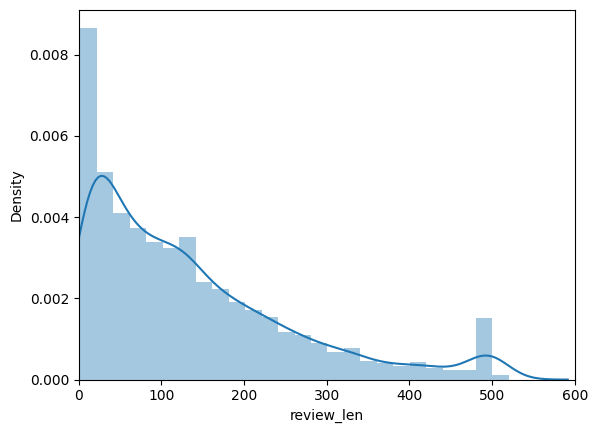

In [21]:

fig, ax = plt.subplots()
sns.distplot(df['review_len'], ax = ax)

# change the limits of X-axis
ax.set_xlim(0,600)
plt.show()

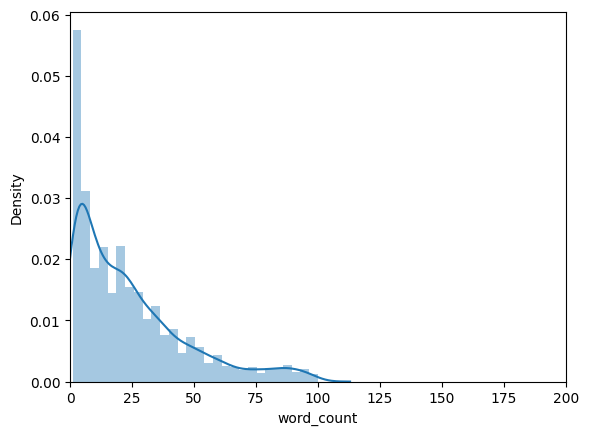

In [22]:
fig, ax = plt.subplots()
sns.distplot(df['word_count'], ax = ax)

# change the limits of X-axis
ax.set_xlim(0,200)
plt.show()

In [23]:
# write a function to print reviews of length 1
single_word_list=[]
for x in df['review']:
    p= len(x.split())
    if(p==1):
        single_word_list.append(x)
single_word_len=len(single_word_list)
print(single_word_len)
print(single_word_list)

179
['Ooosum', 'Good', 'Nice', 'Good', 'Great', 'Nice', 'Good', 'Perfect', 'Nice', 'Superb', 'Marvelous', 'Good', 'Good', 'Good', 'Excellent', 'Best', 'Good', 'Good', 'Nyc', 'Good', 'Supar', 'Good', 'Best', 'Osm', 'Good', 'Bad', 'Good', 'Awesome', 'Good', 'Superb', 'Osm', 'Osm.', 'Super...ðŸ”¥ðŸ”¥ðŸ”¥', 'awsome', 'Good', 'Nice', 'Excellent', 'Nice', 'Fabulous', 'Nice', 'Good', 'Nice', 'Happy', 'Nice', 'Good', 'Osm', 'Sup...', 'Nice', 'Best', 'Nice', 'good', 'Great', 'Good', 'Okk', 'Good.,......,....', 'Excellent', 'Nice', 'Osm', 'Super', 'Good', 'Good', 'Good', 'Osm', 'good', 'Good', 'Best', 'Nice', 'Nyc', 'Happy', 'Good', 'Good', 'Good', 'Good', 'Good', 'Super', 'Nice', 'nice', 'outstanding...', 'Excellent', 'Nice', 'Best', 'Super', 'Good', 'Super', 'Nice', 'Nice', 'Good', 'Nice', 'Good', 'Superb', 'Good', 'Nice', 'Wow', 'awesome', 'good', 'nice', 'superb', 'best', 'Goods', 'Bad', 'good', 'good', 'Awesome', 'Excellent', 'Fantastic', 'Good', 'Amazing', 'Nive', 'Good', 'Osmm...', 'Excel

In [24]:
# write a function to print reviews of length 2
two_word_list=[]
for x in df['review']:
    p= len(x.split())
    if(p==2):
        two_word_list.append(x)
two_word_len=len(two_word_list)
print(two_word_len)
print(two_word_list)

## observed one and two words are mostly ajjectives with postive or negative sentimensts,
## so we didnt remove them


322
['Nice product', 'Best product', 'Mic complaint', 'Fantastic product', 'Awsm product', 'Nice one', 'Impressed... â˜ºï¸_x008f_', 'Bad quality', 'Nice ?', 'Love it', 'Awesome product', 'Superb product', 'Good product', 'Super product', 'Very good', 'Nice quality', 'Good product', 'Awesome Product', 'mind blowing', 'Too Good', 'Good product', 'Best neckband', 'Good product', 'Good product', 'Good oneðŸ”¥ðŸ”¥', 'Superb ðŸ‘_x008d_ðŸ‘_x008d_ðŸ‘_x008d_ðŸ˜_x008d_ðŸ˜_x008d_ðŸ˜_x008d_ðŸ˜_x008d_', 'Nyc headset..', 'Nice products', 'Nice product.', 'Good product', 'Super ðŸ˜˜', 'Best product', 'Nice product', 'Excellent product', 'Soo nice', 'Very good', 'Worthy product', 'Awesome product', 'Best product', 'Very good', 'Nice product', 'Bad product', 'Nice product', 'Nice product', 'Good product', "It's okay", 'Very awesom', 'Connecting problem', 'Poor quality', 'Osam sound', 'Nice product', 'Osm product', 'Nice product', 'Best product', 'Super quality', 'Good products', 'Very good', 'Very good

In [25]:
# definng a function to count the re occurences
def count_regexp_occ(regexp="", text=None):

    return len(re.findall(regexp, text))

In [26]:
# writing a function
def numerical_features(df):
    df['char_count'] = df['review'].apply(len)
    df['num_words'] = df['review'].apply(lambda comment: len(comment.split()))
    df['capitals'] = df['review'].apply(lambda comment: sum(1 for c in comment if c.isupper()))
    #df['caps_vs_length'] = df.apply(lambda row: float(row['capitals'])/float(row['char_count']),
    #axis=1)
    df['#!_marks'] = df['review'].apply(lambda comment: comment.count("!"))
    df['#?_marks'] = df['review'].apply(lambda comment: comment.count("?"))
    df['num_punctuation'] = df['review'].apply(lambda x:
                            len([c for c in str(x) if c in string.punctuation]))
    df['num_stopwords'] = df['review'].apply(lambda x:
                            len([w for w in str(x).lower().split() if w in stop_words]))
    df['num_symbols'] = df['review'].apply(lambda comment: sum(comment.count(w) for w in "*&$%"))
    df['mean_word_len'] = df['review'].apply(lambda x: np.mean([len(w) for w in str(x).split()]))
    df['num_unique_words'] = df['review'].apply(lambda comment: len(set(w for w in comment.split())))
    #df['words_vs_unique'] = df['num_unique_words'] / df['num_words']
    df['num_smilies'] = df['review'].apply(lambda comment:sum(comment.count(w)
                                                for w in (':-)',':)',';-)',';)')))
# Count number of \n
    df['ant_slash_n'] = df['review'].apply(lambda x: count_regexp_occ(r"\n", x))

# Check for time stamp
    df['has_timestamp'] = df['review'].apply(lambda x: count_regexp_occ(r"\d{2}|:\d{2}", x))

# Check for http links
    df['has_http'] = df['review'].apply(lambda x: count_regexp_occ(r"http[s]{0,1}://\S+", x))
    return


In [27]:
numerical_features(df)

In [28]:
# dataframe attached with numerical features
df.head(3).T

,0,1,2
review,1-more flexible2-bass is very high3-sound clarity is good 4-battery back up ...,Super sound and good looking I like that prize,Very much satisfied with the device at this price point being from an awesom...
review_len,493,46,349
word_count,88,9,62
avg_word_len,4.613636,4.222222,4.645161
char_count,493,46,349
num_words,88,9,62
capitals,2,2,7
#!_marks,0,0,0
#?_marks,0,0,0
num_punctuation,18,0,8




> Part Of Speech Analysis



In [29]:
## POS tag Analysis
def tag_part_of_speech(text):
    text_splited = text.split(' ')
    text_splited = [''.join(c for c in s if c not in string.punctuation) for s in text_splited]
    text_splited = [s for s in text_splited if s]
    pos_list = pos_tag(text_splited)
    noun_count = len([w for w in pos_list if w[1] in ('NN','NNP','NNPS','NNS')])
    adjective_count = len([w for w in pos_list if w[1] in ('JJ','JJR','JJS')])
    verb_count = len([w for w in pos_list if w[1] in ('VB','VBD','VBG','VBN','VBP','VBZ')])
    adverb_count = len([w for w in pos_list if w[1] in ('RB','RBR','RBS')])

    return[noun_count, adjective_count, verb_count,adverb_count]

In [30]:
nltk.download('averaged_perceptron_tagger')
for df in ([df]):
    df['nouns'], df['adjectives'], df['verbs'],df['adverbs'] = zip(*df['review'].apply(lambda comment: tag_part_of_speech(comment)))
    df['nouns_vs_length'] = df['nouns'] / df['char_count']
    df['adjectives_vs_length'] = df['adjectives'] / df['char_count']
    df['verbs_vs_length'] = df['verbs'] /df['char_count']
    df['nouns_vs_words'] = df['nouns'] / df['num_words']
    df['adjectives_vs_words'] = df['adjectives'] / df['num_words']
    df['verbs_vs_words'] = df['verbs'] / df['num_words']


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [31]:
df.head(3).T

,0,1,2
review,1-more flexible2-bass is very high3-sound clarity is good 4-battery back up ...,Super sound and good looking I like that prize,Very much satisfied with the device at this price point being from an awesom...
review_len,493,46,349
word_count,88,9,62
avg_word_len,4.613636,4.222222,4.645161
char_count,493,46,349
num_words,88,9,62
capitals,2,2,7
#!_marks,0,0,0
#?_marks,0,0,0
num_punctuation,18,0,8




> Ngram exploration before removing stop words & lemmatization



In [32]:
from nltk.util import ngrams
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
# getting top n grams
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]

<Axes: >

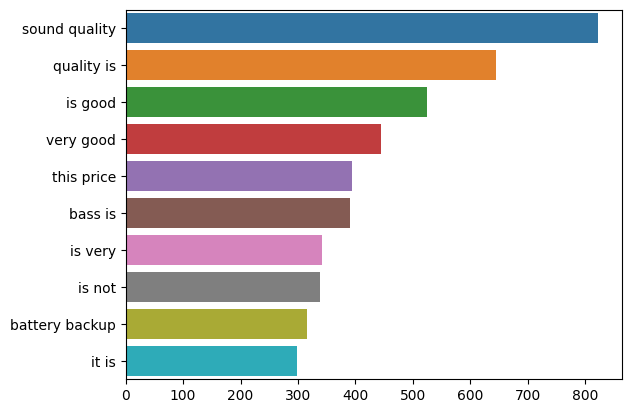

In [34]:
#Two words N_gram
top_n_bigrams=get_top_ngram(df['review'],2)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

In [35]:
pos_list=[]
for i in x:
    pos_list.append(pos_tag(i.split()))
pos_list
## observing 2_gram map and POS_tag, 2_grams didnt preserve that much of sentiments
## through adjectives

[[('sound', 'JJ'), ('quality', 'NN')],
 [('quality', 'NN'), ('is', 'VBZ')],
 [('is', 'VBZ'), ('good', 'JJ')],
 [('very', 'RB'), ('good', 'JJ')],
 [('this', 'DT'), ('price', 'NN')],
 [('bass', 'NN'), ('is', 'VBZ')],
 [('is', 'VBZ'), ('very', 'RB')],
 [('is', 'VBZ'), ('not', 'RB')],
 [('battery', 'NN'), ('backup', 'NN')],
 [('it', 'PRP'), ('is', 'VBZ')]]

<Axes: >

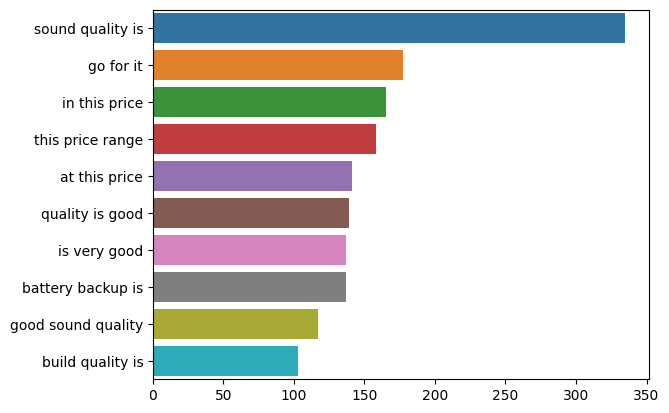

In [36]:
#Three words N_gram
top_n_bigrams=get_top_ngram(df['review'],3)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

In [37]:
pos_list=[]
for i in x:
    pos_list.append(pos_tag(i.split()))
pos_list

[[('sound', 'JJ'), ('quality', 'NN'), ('is', 'VBZ')],
 [('go', 'VB'), ('for', 'IN'), ('it', 'PRP')],
 [('in', 'IN'), ('this', 'DT'), ('price', 'NN')],
 [('this', 'DT'), ('price', 'NN'), ('range', 'NN')],
 [('at', 'IN'), ('this', 'DT'), ('price', 'NN')],
 [('quality', 'NN'), ('is', 'VBZ'), ('good', 'JJ')],
 [('is', 'VBZ'), ('very', 'RB'), ('good', 'JJ')],
 [('battery', 'NN'), ('backup', 'NN'), ('is', 'VBZ')],
 [('good', 'JJ'), ('sound', 'NN'), ('quality', 'NN')],
 [('build', 'JJ'), ('quality', 'NN'), ('is', 'VBZ')]]

<Axes: >

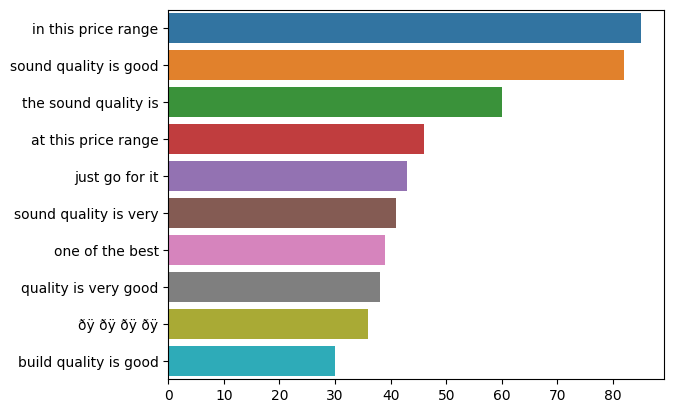

In [38]:
#four words N_gram
top_n_bigrams=get_top_ngram(df['review'],4)[:10]
x,y=map(list,zip(*top_n_bigrams))
sns.barplot(x=y,y=x)

In [39]:
pos_list=[]
for i in x:
    pos_list.append(pos_tag(i.split()))
pos_list

[[('in', 'IN'), ('this', 'DT'), ('price', 'NN'), ('range', 'NN')],
 [('sound', 'JJ'), ('quality', 'NN'), ('is', 'VBZ'), ('good', 'JJ')],
 [('the', 'DT'), ('sound', 'NN'), ('quality', 'NN'), ('is', 'VBZ')],
 [('at', 'IN'), ('this', 'DT'), ('price', 'NN'), ('range', 'NN')],
 [('just', 'RB'), ('go', 'VB'), ('for', 'IN'), ('it', 'PRP')],
 [('sound', 'JJ'), ('quality', 'NN'), ('is', 'VBZ'), ('very', 'RB')],
 [('one', 'CD'), ('of', 'IN'), ('the', 'DT'), ('best', 'JJS')],
 [('quality', 'NN'), ('is', 'VBZ'), ('very', 'RB'), ('good', 'JJ')],
 [('ðÿ', 'JJ'), ('ðÿ', 'NNP'), ('ðÿ', 'NNP'), ('ðÿ', 'NN')],
 [('build', 'JJ'), ('quality', 'NN'), ('is', 'VBZ'), ('good', 'JJ')]]

Insight on 2,3,4_grams  
we can observe that many people are worried of sound quality, noise cancellation, working of
mic  

adjectives are somewhat in frequent in top 2,3,4_grams

# Data Preprocessing

In [40]:
pd.set_option('display.max_colwidth', -1) # to display entire record text

In [41]:
df['review'][15:20]

15    Very great product at this price I will assure that this is a value for money product and the bass and sound quality was awesome the build quality was great ðŸ‘Œ and this product has a mat finish which gives a class and flagship look this is the best and the fast charging technology was working very well and the ear are fixing suitable in our ear the music quality was great                                                                                                                      
16    It's very good and its bass is very high This bluetooth is very good best value or money but battery is too tiny.....Battery backup is not long time but it's realy fast charging support so little battery is comfortable with fast charging                                                                                                                                                                                                                                                                

Insight  

clearly we can see that the reviews have special characters like: ðŸ˜„ðŸ˜„ðŸ˜‰,\n,ASCII, some capitalzed words,

some short forms like don't (called as contractions), will preprocess to remove all these types

In [42]:
# Converting Strings to Lowercase
df['review'] = [review.strip().lower() for review in df['review']]
df['review'][:5]

0    1-more flexible2-bass is very high3-sound clarity is good 4-battery back up to 6 to 8 hour's 5-main thing is fastest charging system is available in that. only 20 min charge and get long up to 4 hours back up 6-killing look awesome 7-for gaming that product does not support 100% if you want for gaming then i'll recommend you please don't buy but you want for only music then this product is very well for you.. 8-no more wireless headphones are comparing with that headphones at this pric...
1    super sound and good looking i like that prize                                                                                                                                                                                                                                                                                                                                                                                                                                                               
2 

# Defining the functions to perform basic wranglings like
expanding contractions......like don't as do not

remove accented characters... like e~, etc

scrub words.... to remove special characters like ?, * etc

In [43]:
df['review'][5] #this review has it's

"wowwww it's amezing bluetooth nice look, nice price, nice battery back up, i love always flipkart product's and flipkart replacement and refund policy, you can return or refund after received a demegzed product"

In [44]:
contractions = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"

}

In [45]:
def expand_contractions(text):
    for word in text.split():
        if word.lower() in contractions:
            text = text.replace(word, contractions[word.lower()])
    return text

# Invoking the expand_contractions functions

In [46]:
df['review'] = [expand_contractions(re.sub('’', "'", review)) for review in df['review']]
df['review'][5]

"wowwww it is amezing bluetooth nice look, nice price, nice battery back up, i love always flipkart product's and flipkart replacement and refund policy, you can return or refund after received a demegzed product"

In [47]:
import unicodedata
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    #https://docs.python.org/2/library/unicodedata.html
    return text

In [48]:
df['review'][17]

'good product. never used bluetooth headset before. now i am happy to see ease in my work. as i noticed boat marketing their products aggressively in market in recent days. about product it is like awesome having better build quality, bass is good, battery backup is fine and vibration though it vibrates my neck when ever i gets call but still feature is must needed when u are driving. wanted to give 5star but there is a sentence that " nothing is perfect in this imperfect world" ðÿ˜„ðÿ˜„ðÿ˜‰'

# Invoking the remove_accented_chars functions

In [49]:
df['review'] = [remove_accented_chars(review) for review in df['review']]
df['review'][17]

'good product. never used bluetooth headset before. now i am happy to see ease in my work. as i noticed boat marketing their products aggressively in market in recent days. about product it is like awesome having better build quality, bass is good, battery backup is fine and vibration though it vibrates my neck when ever i gets call but still feature is must needed when u are driving. wanted to give 5star but there is a sentence that " nothing is perfect in this imperfect world" y y y '

In [50]:
df['review'][11]

'nice build quality.. bass is best it self.. vibrate at call is nice. .. nice support from flipkart and delivery partner'

In [51]:
# defining function to scrub special characters
def scrub_words(text):
    #Replace \xao characters in text
    text = re.sub('\xa0', ' ', text)

    #Replace non ascii / not words and digits
    text = re.sub("(\\W|\\d)",' ',text)

    #Replace new line characters and following text untill space
    text = re.sub('\n(\w*?)[\s]', '', text)

    #Remove html markup
    text = re.sub("<.*?>", ' ', text)

    #Remove extra spaces from the text
    text = re.sub("\s+", ' ', text)
    return text

# Invoking the scrub function

In [52]:
pd.set_option('display.max_colwidth', -1)

In [53]:
df['review'] = [scrub_words(review) for review in df['review']]
df['review'][17]

'good product never used bluetooth headset before now i am happy to see ease in my work as i noticed boat marketing their products aggressively in market in recent days about product it is like awesome having better build quality bass is good battery backup is fine and vibration though it vibrates my neck when ever i gets call but still feature is must needed when u are driving wanted to give star but there is a sentence that nothing is perfect in this imperfect world y y y '

In [54]:
df.head().T

,0,1,2,3,4
review,more flexible bass is very high sound clarity is good battery back up to to hour s main thing is fastest charging system is available in that only min charge and get long up to hours back up killing look awesome for gaming that product does not support if you want for gaming then i will recommend you please do not buy but you want for only music then this product is very well for you no more wireless headphones are comparing with that headphones at this pric,super sound and good looking i like that prize,very much satisfied with the device at this price point being from an awesome brand design wise i liked it more than rockerz model bought the model blindly on its very first day with zero reviews and it was a wonderful choice i must say bluetooth enables us to connect devices simultaneously and vibration motor for calls its too good,nice headphone bass was very good and sound is clear i am purchase for calling purpose and best choice even riding on bike wear in one ear and opposite end voice was clear and no complaint for calling battery backup full day,sound quality super battery backup super quality super this price range super and this value for money
review_len,493,46,349,230,102
word_count,88,9,62,43,17
avg_word_len,4.613636,4.222222,4.645161,4.372093,5.058824
char_count,493,46,349,230,102
num_words,88,9,62,43,17
capitals,2,2,7,3,1
#!_marks,0,0,0,0,0
#?_marks,0,0,0,0,0
num_punctuation,18,0,8,4,0


# INSIGHT :we can clearly observe the above reviews are scrubbed to our requirement

In [55]:
#removing columns from df_pre

col_drop=['review_len','word_count', 'avg_word_len', 'char_count', 'num_words', 'capitals', '#!_marks',
       '#?_marks', 'num_punctuation', 'num_stopwords', 'num_symbols',
       'mean_word_len', 'num_unique_words', 'num_smilies', 'ant_slash_n',
       'has_timestamp', 'has_http', 'nouns', 'adjectives', 'verbs', 'adverbs',
       'nouns_vs_length', 'adjectives_vs_length', 'verbs_vs_length',
       'nouns_vs_words', 'adjectives_vs_words', 'verbs_vs_words']

In [56]:
df.drop(col_drop, axis =1, inplace=True)

In [57]:
# Importing spacy
import spacy

# Loading model
nlp = spacy.load('en_core_web_sm',disable=['parser', 'ner'])

# Lemmatization with stopwords removal
df['review_lemm']=df['review'].apply(lambda x: ' '.join([token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

In [58]:
df.head(4).T

,0,1,2,3
review,more flexible bass is very high sound clarity is good battery back up to to hour s main thing is fastest charging system is available in that only min charge and get long up to hours back up killing look awesome for gaming that product does not support if you want for gaming then i will recommend you please do not buy but you want for only music then this product is very well for you no more wireless headphones are comparing with that headphones at this pric,super sound and good looking i like that prize,very much satisfied with the device at this price point being from an awesome brand design wise i liked it more than rockerz model bought the model blindly on its very first day with zero reviews and it was a wonderful choice i must say bluetooth enables us to connect devices simultaneously and vibration motor for calls its too good,nice headphone bass was very good and sound is clear i am purchase for calling purpose and best choice even riding on bike wear in one ear and opposite end voice was clear and no complaint for calling battery backup full day
review_lemm,flexible bass high sound clarity good battery hour s main thing fast charge system available min charge long hour kill look awesome game product support want gaming recommend buy want music product wireless headphone compare headphone pric,super sound good look like prize,satisfied device price point awesome brand design wise like rockerz model buy model blindly day zero review wonderful choice bluetooth enable connect device simultaneously vibration motor call good,nice headphone bass good sound clear purchase call purpose good choice ride bike wear ear opposite end voice clear complaint call battery backup day


Using VADER Sentiment Analysis on reviews to assign labels

# first observing how vader sentimentanalyzer works

In [59]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [60]:
# Import SentimentIntensityAnalyzer and create an sid object
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

In [61]:
pd.set_option('max_colwidth',-1)

# VADER and Valence Score

In [62]:
## define function to analyze score

def sentiment_analyzer_scores(sentence):
    score = sid.polarity_scores(sentence)
    print("{:-<30} {}".format(sentence, str(score)))

In [63]:
sentiment_analyzer_scores("the weather is cool.")
sentiment_analyzer_scores("the weather is super cool.")

# sid_obj = SentimentIntensityAnalyzer()

# sentiment_dict = sid_obj.polarity_scores('the weather is cool.')

# print("Overall sentiment dictionary is : ", sentiment_dict)
# print("sentence was rated as ", sentiment_dict['neg']*100, "% Negative")
# print("sentence was rated as ", sentiment_dict['neu']*100, "% Neutral")
# print("sentence was rated as ", sentiment_dict['pos']*100, "% Positive")

the weather is cool.---------- {'neg': 0.0, 'neu': 0.566, 'pos': 0.434, 'compound': 0.3182}
the weather is super cool.---- {'neg': 0.0, 'neu': 0.326, 'pos': 0.674, 'compound': 0.7351}


In [64]:
df['scores'] = df['review_lemm'].apply(lambda review_lemm:sid.polarity_scores(review_lemm))
df.head(2)

,review,review_lemm,scores
0,more flexible bass is very high sound clarity is good battery back up to to hour s main thing is fastest charging system is available in that only min charge and get long up to hours back up killing look awesome for gaming that product does not support if you want for gaming then i will recommend you please do not buy but you want for only music then this product is very well for you no more wireless headphones are comparing with that headphones at this pric,flexible bass high sound clarity good battery hour s main thing fast charge system available min charge long hour kill look awesome game product support want gaming recommend buy want music product wireless headphone compare headphone pric,"{'neg': 0.092, 'neu': 0.528, 'pos': 0.38, 'compound': 0.8934}"
1,super sound and good looking i like that prize,super sound good look like prize,"{'neg': 0.0, 'neu': 0.137, 'pos': 0.863, 'compound': 0.9118}"


In [65]:
df['compound_score']  = df['scores'].apply(lambda score_dict: score_dict['compound'])

In [66]:
df.head(2)

,review,review_lemm,scores,compound_score
0,more flexible bass is very high sound clarity is good battery back up to to hour s main thing is fastest charging system is available in that only min charge and get long up to hours back up killing look awesome for gaming that product does not support if you want for gaming then i will recommend you please do not buy but you want for only music then this product is very well for you no more wireless headphones are comparing with that headphones at this pric,flexible bass high sound clarity good battery hour s main thing fast charge system available min charge long hour kill look awesome game product support want gaming recommend buy want music product wireless headphone compare headphone pric,"{'neg': 0.092, 'neu': 0.528, 'pos': 0.38, 'compound': 0.8934}",0.8934
1,super sound and good looking i like that prize,super sound good look like prize,"{'neg': 0.0, 'neu': 0.137, 'pos': 0.863, 'compound': 0.9118}",0.9118


In [67]:
df['label'] = df['compound_score'].apply(lambda c: 'pos' if c >=0.5 else('neu'if  c<0.5 and c>-0.5 else 'neg'))

df.head(2)

,review,review_lemm,scores,compound_score,label
0,more flexible bass is very high sound clarity is good battery back up to to hour s main thing is fastest charging system is available in that only min charge and get long up to hours back up killing look awesome for gaming that product does not support if you want for gaming then i will recommend you please do not buy but you want for only music then this product is very well for you no more wireless headphones are comparing with that headphones at this pric,flexible bass high sound clarity good battery hour s main thing fast charge system available min charge long hour kill look awesome game product support want gaming recommend buy want music product wireless headphone compare headphone pric,"{'neg': 0.092, 'neu': 0.528, 'pos': 0.38, 'compound': 0.8934}",0.8934,pos
1,super sound and good looking i like that prize,super sound good look like prize,"{'neg': 0.0, 'neu': 0.137, 'pos': 0.863, 'compound': 0.9118}",0.9118,pos


In [68]:
df.label.value_counts()

pos    2481
neu    1115
neg    204 
Name: label, dtype: int64

In [71]:
df.to_excel('flipkart_labels.xlsx', index=True)

In [72]:
df.to_excel(r'/content/drive/MyDrive/flipkart_labels.xlsx', index=True)